<img src='portada.png' align='center'>

<h1 align=center><font size=7>Case Study - Hacker Statistics 🎲</font></h1>

<h4 align=center><font size=3>Estudio de caso para poner en práctica lo aprendido en el curso "Intermediate Python". </font></h4>

Lo primero que necesitaremos son generadores aleatorios, para poder simular el dado. 

La función **rand()** del paquete random de numpy genera un flotante aleatorio entre 0 y 1 si no se especifica ningún argumento.

La función **randint()**, también una función del paquete random, genera números enteros al azar.

**seed()** establece la semilla aleatoria, de modo que sus resultados sean reproducibles entre simulaciones. Como argumento, toma un número entero de su elección. El valor semilla es un valor base utilizado por un generador pseudoaleatorio para producir números aleatorios.  Si llama a la función, no se generará ningún resultado.

Un **número pseudoaleatorio** es un número generado en un proceso que parece producir números al azar, pero no lo hace realmente. Las secuencias de números pseudoaleatorios no muestran ningún patrón o regularidad aparente desde un punto de vista estadístico, a pesar de haber sido generadas por un algoritmo completamente determinista, en el que las mismas condiciones iniciales producen siempre el mismo resultado.

In [1]:
# Importar librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos la semilla
np.random.seed(123)

### Determinar el próximo movimiento

Usaremos randint() para crear la variable 'dice' y una construcción if-elif-else.

- Si el dado es 1 o 2, bajas un paso.
- Si los dados son 3, 4 o 5, subes un paso.
- Si sacas un 6, lanzarás el dado de nuevo y subirás el número de pasos resultante.

In [3]:
# Crear una lista que contiene el primero paso, 0
random_walk = [0]

# Simularemos 100 lanzamientos

for x in range(100) :
    # Seleccionar el ultimo paso en random_walk
    step = random_walk[-1]
    
    # Numero aleatorio entre 1 y 6
    dice = np.random.randint(1,7)

    # Determinar el proximo paso
    if dice <= 2:
        step = step - 1
        
    elif dice <= 5:
        step = step + 1
        
    else:
        step = step + np.random.randint(1,7)

    # Añadir el paso a random_walk
    random_walk.append(step)

print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, -1, 0, 5, 4, 3, 4, 3, 4, 5, 6, 7, 8, 7, 8, 7, 8, 9, 10, 11, 10, 14, 15, 14, 15, 14, 15, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 32, 33, 37, 38, 37, 38, 39, 38, 39, 40, 42, 43, 44, 43, 42, 43, 44, 43, 42, 43, 44, 46, 45, 44, 45, 44, 45, 46, 47, 49, 48, 49, 50, 51, 52, 53, 52, 51, 52, 51, 52, 53, 52, 55, 56, 57, 58, 57, 58, 59]


### ¿Cúan bajo se puede ir?

Ya tenemos un código que calcula la ubicación en el Empire State Building después de 100 lanzamientos de dados. Sin embargo, hay algo en lo que no hemos pensado: ¡no se puede ir por debajo de 0!, es decir, no podemos tenemos resultados negativos.

Una forma típica de resolver problemas como este es usando max(). Si se pasa a max() dos argumentos, se devuelve el más grande.

In [4]:
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Usar max() para que devuelva 0 en caso de obtener un numero negativo
        step = max(0, step-1)
        
    elif dice <= 5:
        step = step + 1
        
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 4, 3, 2, 4, 3, 4, 6, 7, 8, 13, 12, 13, 14, 15, 16, 17, 16, 21, 22, 23, 24, 23, 22, 21, 20, 19, 20, 21, 22, 28, 27, 26, 25, 26, 27, 28, 27, 28, 29, 28, 33, 34, 33, 32, 31, 30, 31, 30, 29, 31, 32, 35, 36, 38, 39, 40, 41, 40, 39, 40, 41, 42, 43, 42, 43, 44, 45, 48, 49, 50, 49, 50, 49, 50, 51, 52, 56, 55, 54, 55, 56, 57, 56, 57, 56, 57, 59, 64, 63, 64, 65, 66, 67, 68, 69, 68, 69, 70, 71, 73]


### Visualizar la caminata

<function matplotlib.pyplot.show(close=None, block=None)>

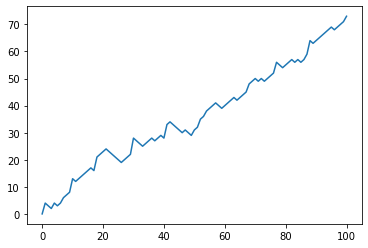

In [5]:
plt.plot(random_walk)
plt.show

### Distribución

Ya sabemos cómo simular una caminata aleatoria pero todavía tenemos que responder a la pregunta principal: ¿cuál es la probabilidad de alcanzar los 60 escalones de altura?.

Cada caminata aleatoria terminará en un paso diferente. Si simulas esta caminata miles de veces, terminarás con miles de pasos finales. Esta es en realidad una distribución de pasos finales. Y una vez que conoce la distribución, puede comenzar a calcular las posibilidades.

Para tener una idea de cuán grandes son las posibilidades de alcanzar los 60 pasos, podemos simular repetidamente la caminata aleatoria y recopilar los resultados.

In [6]:
# Crear una lista vacia para recopilar todos los resultados
all_walks = []

# Simular una caminata aleatoria diez veces
for i in range(10) :

    # El codigo definido anteriormente
    random_walk = [0]
    
    for x in range(100):
        
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
            
        elif dice <= 5:
            step = step + 1
            
        else:
            step = step + np.random.randint(1,7)
            
        random_walk.append(step)

    # Agregar los resultados de cada una de las diez simulaciones en la lista all_walks
    all_walks.append(random_walk)

In [7]:
len(all_walks)

10

all_walks es una lista de listas: cada sublista representa un solo paseo aleatorio. Si se convierte en una matriz NumPy podemos comenzar a hacer gráficos interesantes!

In [8]:
np_aw = np.array(all_walks)

Transponemos np_aw llamando a np.transpose(), con esto cada fila representará la posición despues de un lanzamiento en las diez caminatas aleatorias.

In [9]:
##### Ejemplo de cómo funciona el transponer

array = [[1, 2, 3, 4, 5],
         [6, 7, 8, 9, 10],
         [11, 12, 13, 14, 15]]
np.transpose(array)

array([[ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14],
       [ 5, 10, 15]])

In [10]:
#Transponemos np_aw y guardamos el resultado en np_aw_t
np_aw_t = np.transpose(np_aw)

#### Visualizar todas las caminatas

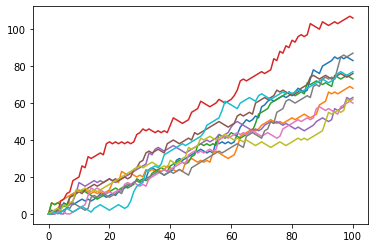

In [11]:
plt.plot(np_aw_t)
plt.show()

### Incluir la posilibidad de caída

Si queremos cambiar el número de veces que se debe simular la caminata, simplemente cambiamos el valor de range() en la primera línea del bucle del código ya escrito.

¡Todavía hay algo que olvidamos! Somos un poco torpes y hay un 0,1% de posibilidades de caernos. Eso requiere otra generación de números aleatorios. Básicamente, puede generar un flotante aleatorio entre 0 y 1. Si este valor es menor o igual a 0.001, debe restablecer el paso a 0.

Como vamos a calcular un valor entre 0 y 1 entonces usamos np.random.rand()

In [12]:
all_walks = []

# Simulamos 500 caminatas
for i in range(500):
    
    random_walk = [0]
    
    for x in range(100):
        
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        
        if dice <= 2:
            step = max(0, step - 1)
            
        elif dice <= 5:
            step = step + 1
            
        else:
            step = step + np.random.randint(1,7)

        # Implementamos la posibilidad de caida
        if  np.random.rand() <= 0.001:
            step = 0

        random_walk.append(step)
        
    all_walks.append(random_walk)

### Graficar la distribución

¿cuáles son entonces las probabilidades de que alcanzar los 60 escalones de altura en el Empire State Building?

Básicamente, deseamos conocer los puntos finales de todas las caminatas aleatorias que hemos simulado. Estos puntos finales tienen una cierta distribución que se puede visualizar con un histograma.

In [13]:
np_aw = np.array(all_walks)
np_aw_t = np.transpose(np_aw)

Debemos seleccionar la última fila de np_aw_t ya que contiene el punto final de los 500 recorridos aleatorios que hemos simulado.

In [14]:
ends = np_aw_t[-1]

(array([  6.,   9.,   7.,  26.,  71., 123., 136.,  85.,  24.,  13.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

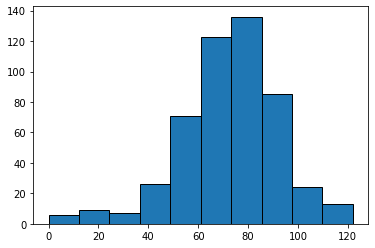

In [15]:
plt.hist(ends, edgecolor='black')

### Calcular las probabilidades

Para obtener las posibilidades de subir los 60 escalones debemos obtener el total de veces que el punto final de la caminta fue mayor o igual a 60 y dividirlo por el total de simulaciones.

In [16]:
ends_greater_60 = len(ends[ends>=60])
total_walks = len(all_walks)

In [17]:
odds = round(((ends_greater_60 / total_walks) * 100), 3)
print(f'La posibilidad de alcanzar los 60 escalones es {odds}%')

La posibilidad de alcanzar los 60 escalones es 77.6%
